In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mapclassify import classify
import pandas as pd
import numpy as np
import folium
import geopy

# **Leyendo y escribiendo archivos**

**GeoPandas** puede leer casi cualquier formato de datos espaciales basado en vectores, incluyendo ESRI shapefile, archivos GeoJSON y más utilizando el comando: `geopandas.read_file()`

el cual devuelve un objeto `GeoDataFrame`. Esto es posible porque geopandas hace uso de la librería **fiona**

In [3]:
import fiona; fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

Hay distintas formas de leer los archivos:

* ZIP files:

`zipfile = "zip:///Users/name/Downloads/cb_2017_us_state_500k.zip"`

`states = geopandas.read_file(zipfile)`

Si el dataset se encuentra en una carpeta del archivo ZIP, deberá añadir su nombre:

`zipfile = "zip:///Users/name/Downloads/gadm36_AFG_shp.zip!data"`




* Files desde URL:

`url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"`

`df = geopandas.read_file(url)`

* O bien, importar files desde tu equipo local

En este caso vamos a utilizar archivos desde una URL

In [4]:
estados = gpd.read_file(r"https://raw.githubusercontent.com/BobadillaE/Pobreza_Mexico_RStudio/main/Datasets%20empleados/formatted4.json")

In [5]:
municipios = gpd.read_file(r"https://raw.githubusercontent.com/angelnmara/geojson/master/MunicipiosMexico.json")

Para escribir un `GeoDataFrame` en un archivo con distinto formato se usa: `GeoDataFrame.to_file()`. 

El formato de archivo por defecto es Shapefile, pero puede especificar el suyo propio con la keyword en el `driver`:

`gdf.to_file("my_file.geojson", driver="GeoJSON")`



---



# **`Pandas` dataframes y `GeoPandas` Geodataframes**

Podemos tener dos dataframes distintos, un `pandas.DataFrame` y un `geopandas.GeoDataFrame`, y aplicar todas las funciones de pandas para juntar dos dataframes, lo que resultaría en este caso en un `geopandas.GeoDataFrame`.

In [6]:
pd_df = pd.read_csv(r"https://raw.githubusercontent.com/BobadillaE/Pobreza_Mexico_RStudio/main/Datasets%20empleados/DF_MX.xlsx%20-%20Hoja1.csv")

In [7]:
pd_df.head()

,municipio_code,region,state_name,state_abbr_official,id,pop,pop_male,pop_female,afromexican,indigenous_language,...,pibPC,total_viviendas,sinAlimentos,difAlimentos,lejaniaHospital,aguaDiaria,sinAfiliacion,rezagoEdu,estadoDerecho,techo
0,1,1001,AGUASCALIENTES,Ags.,MX-AGU,948990,462073,486917,15170,1839.0,...,142703,386782,9.6,43.1,25,85.4,16.0,15.7,44.0,97.3
1,2,2002,BAJA CALIFORNIA,BC,MX-BCN,1049792,529248,520544,11105,5920.0,...,152317,1144066,9.3,40.9,30,92.6,22.0,16.1,39.0,49.7
2,3,3003,BAJA CALIFORNIA SUR,BCS,MX-BCS,292241,145803,146438,6498,3183.0,...,151590,245689,15.2,49.8,27,23.8,16.0,14.5,43.0,80.7
3,2,4002,CAMPECHE,Camp.,MX-CAM,294077,141555,152522,6794,13151.0,...,481697,257257,17.0,57.4,42,79.8,12.0,19.2,44.0,58.0
4,30,5030,COAHUILA DE ZARAGOZA,Coah.,MX-COA,879958,437792,442166,20036,2174.0,...,166389,903683,10.6,41.9,27,81.2,18.0,14.3,45.0,83.6


In [8]:
merged = pd.merge(estados, pd_df, on='id')

In [9]:
merged.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,...,pibPC,total_viviendas,sinAlimentos,difAlimentos,lejaniaHospital,aguaDiaria,sinAfiliacion,rezagoEdu,estadoDerecho,techo
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,...,87211,452914,9.9,45.9,39,43.5,17.0,21.9,44.0,77.5
1,Veracruz,MX-VER,Mexico,State,26.6,62.1,46,27,51.3,13.5,...,86373,2370865,13.5,59.2,46,62.1,27.0,26.6,37.0,51.3
2,Tlaxcala,MX-TLA,Mexico,State,16.1,46.8,38,23,94.1,14.3,...,65899,335517,14.3,62.8,38,46.8,23.0,16.1,38.0,94.1
3,Tamaulipas,MX-TAM,Mexico,State,15.6,89,33,19,85.9,10.3,...,129590,1050737,10.3,40.4,33,89.0,19.0,15.6,40.0,85.9
4,Tabasco,MX-TAB,Mexico,State,16.6,78,42,21,38.7,29,...,180564,681950,29.0,65.0,42,78.0,21.0,16.6,38.0,38.7


# **Algunos conceptos básicos**

## Áreas

Para medir el `area` de cada polígono se accede al atributo `GeoDataFrame.area`, que devuelve un `pandas.Series`. Esto nos devolverá una nueva columna con el área correspondiente de cada polígono

In [10]:
estados["area"] = estados.area
municipios["area"]= municipios.area

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2000742601.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados["area"] = estados.area
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2000742601.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios["area"]= municipios.area


In [11]:
estados.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,geometry,area
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,"POLYGON ((-100.83230 24.55490, -100.85400 24.5...",6.690885
1,Yucatán,MX-YUC,Mexico,State,21.8,97.8,40,16,92.7,12.6,"POLYGON ((-87.53860 21.48640, -87.53090 21.460...",3.294738
2,Veracruz,MX-VER,Mexico,State,26.6,62.1,46,27,51.3,13.5,"MULTIPOLYGON (((-97.40280 21.48100, -97.42600 ...",5.925776
3,Tlaxcala,MX-TLA,Mexico,State,16.1,46.8,38,23,94.1,14.3,"POLYGON ((-98.58490 19.46750, -98.60570 19.490...",0.358125
4,Tamaulipas,MX-TAM,Mexico,State,15.6,89,33,19,85.9,10.3,"MULTIPOLYGON (((-97.71640 24.27670, -97.71350 ...",6.998695


## Límite del polígono y centroides

Para obtener el límite (perímetro) de cada polígono (`LineString`), acceda a `GeoDataFrame.boundary`. En este caso no tendremos una columna con puros números, sino una columna nueva de geometría

In [12]:
estados['boundary'] = estados.boundary
municipios['boundary'] = municipios.boundary

In [13]:
estados.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,geometry,area,boundary
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,"POLYGON ((-100.83230 24.55490, -100.85400 24.5...",6.690885,"LINESTRING (-100.83230 24.55490, -100.85400 24..."
1,Yucatán,MX-YUC,Mexico,State,21.8,97.8,40,16,92.7,12.6,"POLYGON ((-87.53860 21.48640, -87.53090 21.460...",3.294738,"LINESTRING (-87.53860 21.48640, -87.53090 21.4..."
2,Veracruz,MX-VER,Mexico,State,26.6,62.1,46,27,51.3,13.5,"MULTIPOLYGON (((-97.40280 21.48100, -97.42600 ...",5.925776,"MULTILINESTRING ((-97.40280 21.48100, -97.4260..."
3,Tlaxcala,MX-TLA,Mexico,State,16.1,46.8,38,23,94.1,14.3,"POLYGON ((-98.58490 19.46750, -98.60570 19.490...",0.358125,"LINESTRING (-98.58490 19.46750, -98.60570 19.4..."
4,Tamaulipas,MX-TAM,Mexico,State,15.6,89,33,19,85.9,10.3,"MULTIPOLYGON (((-97.71640 24.27670, -97.71350 ...",6.998695,"MULTILINESTRING ((-97.71640 24.27670, -97.7135..."


También podemos crear nuevas geometrías, que podrían ser, por ejemplo su centroide, el cual nos devuelve igualmente una nueva columna de geometría

In [14]:
estados['centroid'] = estados.centroid
municipios['centroid'] = municipios.centroid

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/3434691993.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados['centroid'] = estados.centroid
/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/3434691993.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios['centroid'] = municipios.centroid


In [15]:
estados.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,geometry,area,boundary,centroid
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,"POLYGON ((-100.83230 24.55490, -100.85400 24.5...",6.690885,"LINESTRING (-100.83230 24.55490, -100.85400 24...",POINT (-102.70883 23.26640)
1,Yucatán,MX-YUC,Mexico,State,21.8,97.8,40,16,92.7,12.6,"POLYGON ((-87.53860 21.48640, -87.53090 21.460...",3.294738,"LINESTRING (-87.53860 21.48640, -87.53090 21.4...",POINT (-88.92724 20.77975)
2,Veracruz,MX-VER,Mexico,State,26.6,62.1,46,27,51.3,13.5,"MULTIPOLYGON (((-97.40280 21.48100, -97.42600 ...",5.925776,"MULTILINESTRING ((-97.40280 21.48100, -97.4260...",POINT (-96.37802 19.35189)
3,Tlaxcala,MX-TLA,Mexico,State,16.1,46.8,38,23,94.1,14.3,"POLYGON ((-98.58490 19.46750, -98.60570 19.490...",0.358125,"LINESTRING (-98.58490 19.46750, -98.60570 19.4...",POINT (-98.08348 19.45261)
4,Tamaulipas,MX-TAM,Mexico,State,15.6,89,33,19,85.9,10.3,"MULTIPOLYGON (((-97.71640 24.27670, -97.71350 ...",6.998695,"MULTILINESTRING ((-97.71640 24.27670, -97.7135...",POINT (-98.67451 24.30078)


## Medir distancias

También podemos medir a qué distancia se encuentra cada centroide de la ubicación de un primer centroide

In [16]:
first_point = estados['centroid'].iloc[23]
estados['distance'] = estados['centroid'].distance(first_point)

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/3594606418.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados['distance'] = estados['centroid'].distance(first_point)


In [17]:
estados['distance']

0      5.416905
1     10.276690
2      2.711974
3      1.026825
4      5.079783
5      6.599274
6     15.665212
7     10.185615
8      3.633745
9     10.977640
10     1.787220
11     1.287129
12     3.496478
13     6.407304
14     6.304376
15     0.511577
16     2.797296
17     0.549369
18     4.728111
19     1.266580
20     1.759890
21     2.560926
22     8.177263
23     0.000000
24     4.835115
25     8.591651
26    12.085150
27     7.159805
28     8.789739
29    14.543083
30    19.571555
31     4.286281
Name: distance, dtype: float64

In [18]:
estados.head()

,name,id,CNTRY,TYPE,edu,agua,salud,segsocial,vivienda,alimento,geometry,area,boundary,centroid,distance
0,Zacatecas,MX-ZAC,Mexico,State,21.9,43.5,39,17,77.5,9.9,"POLYGON ((-100.83230 24.55490, -100.85400 24.5...",6.690885,"LINESTRING (-100.83230 24.55490, -100.85400 24...",POINT (-102.70883 23.26640),5.416905
1,Yucatán,MX-YUC,Mexico,State,21.8,97.8,40,16,92.7,12.6,"POLYGON ((-87.53860 21.48640, -87.53090 21.460...",3.294738,"LINESTRING (-87.53860 21.48640, -87.53090 21.4...",POINT (-88.92724 20.77975),10.276690
2,Veracruz,MX-VER,Mexico,State,26.6,62.1,46,27,51.3,13.5,"MULTIPOLYGON (((-97.40280 21.48100, -97.42600 ...",5.925776,"MULTILINESTRING ((-97.40280 21.48100, -97.4260...",POINT (-96.37802 19.35189),2.711974
3,Tlaxcala,MX-TLA,Mexico,State,16.1,46.8,38,23,94.1,14.3,"POLYGON ((-98.58490 19.46750, -98.60570 19.490...",0.358125,"LINESTRING (-98.58490 19.46750, -98.60570 19.4...",POINT (-98.08348 19.45261),1.026825
4,Tamaulipas,MX-TAM,Mexico,State,15.6,89,33,19,85.9,10.3,"MULTIPOLYGON (((-97.71640 24.27670, -97.71350 ...",6.998695,"MULTILINESTRING ((-97.71640 24.27670, -97.7135...",POINT (-98.67451 24.30078),5.079783


Como `geopandas.GeoDataFrame` es una subclase de `pandas.DataFrame`, disponemos de toda la funcionalidad de pandas para utilizarla, por ejemplo, para calcular la media de las distancias medidas anteriormente, acceda a la columna 'distance' y llame al método mean() sobre ella

In [19]:
estados['distance'].mean()

6.033423838993341



---



# ***Indexing* y *Selecting* de datos**

Además de los métodos estándar de `pandas`, `GeoPandas` también proporciona indexación/selección basada en coordenadas con el indexador `cx`, que corta nuestro mapa utilizando una caja delimitadora. Las geometrías en el GeoSeries o GeoDataFrame que intersecan la caja delimitadora serán devueltas.

<Axes: >

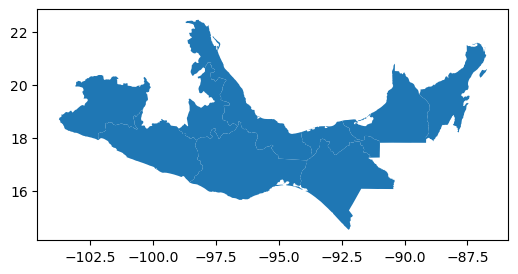

In [20]:
estados_sur = estados.cx[:, :18]

estados_sur.plot(figsize=(10, 3))

<Axes: >

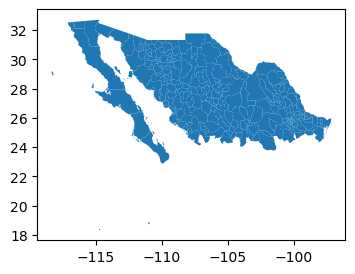

In [21]:
municipios_norte = municipios.cx[:, 25:]

municipios_norte.plot(figsize=(10, 3))



---



# **Haciendo mapas y usando algunas herramientas**

## Mapas Básicos

<Axes: >

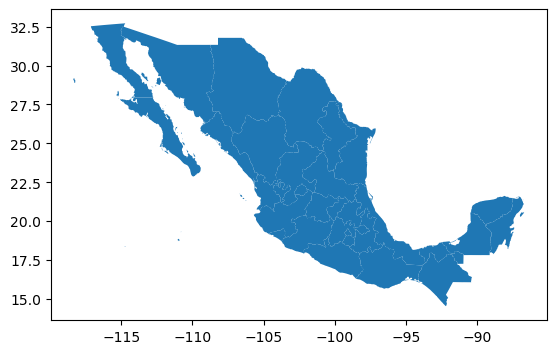

In [22]:
estados.plot()

<Axes: >

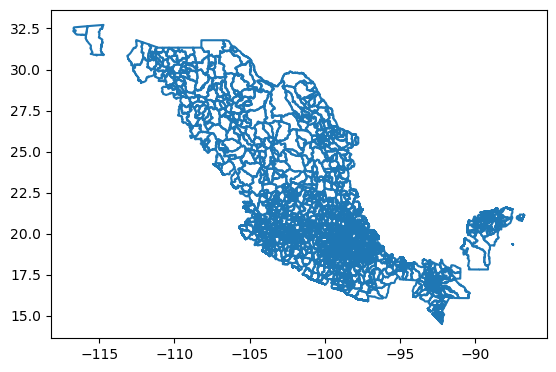

In [23]:
municipios.boundary.plot()

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2460915744.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged.centroid.plot()


<Axes: >

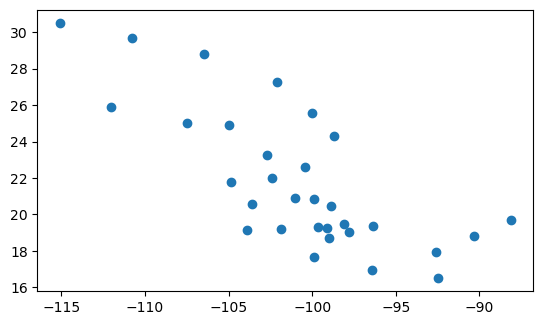

In [24]:
merged.centroid.plot()

## Choropleth Maps

`GeoPandas` facilita la creación de mapas *Choropleth* (mapas en los que el color de cada forma se basa en el valor de una variable asociada).

Sólo habría que utilizar el comando `plot` con el argumento `column` ajustado a la columna cuyos valores desea utilizar para asignar colores

<Axes: >

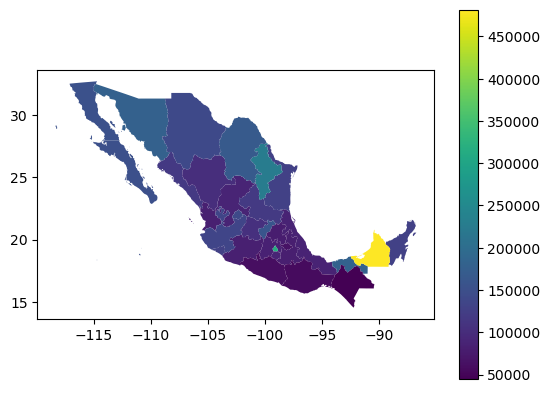

In [25]:
merged.plot(column='pibPC', legend=True)

Se puede modificar el label con `matplotlib`

<Axes: >

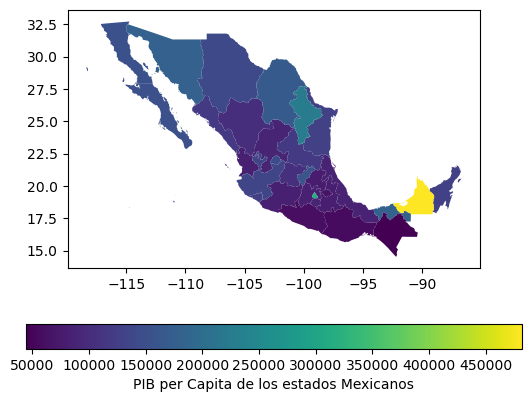

In [26]:
fig, ax = plt.subplots(1, 1)
merged.plot(column='pibPC',
           ax=ax,
           legend=True,
           legend_kwds={'label': "PIB per Capita de los estados Mexicanos",
                        'orientation': "horizontal"})

O incluso el color

<Axes: >

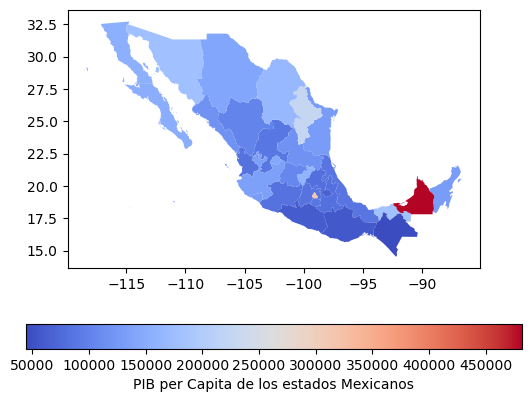

In [27]:
fig, ax = plt.subplots(1, 1)
merged.plot(column='pibPC',
           ax=ax,
           legend=True,
            cmap= 'coolwarm',
           legend_kwds={'label': "PIB per Capita de los estados Mexicanos",
                        'orientation': "horizontal"})

La opción de `scheme` puede establecerse en cualquier esquema proporcionado por `mapclassify` (p. ej. 'box_plot', 'equal_interval', 'fisher_jenks', 'fisher_jenks_sampled', 'headtail_breaks', 'jenks_caspall', 'jenks_caspall_forced', 'jenks_caspall_sampled', 'max_p_classifier', 'maximum_breaks', 'natural_breaks', 'quantiles', 'percentiles', 'std_mean' o 'user_defined').

<Axes: >

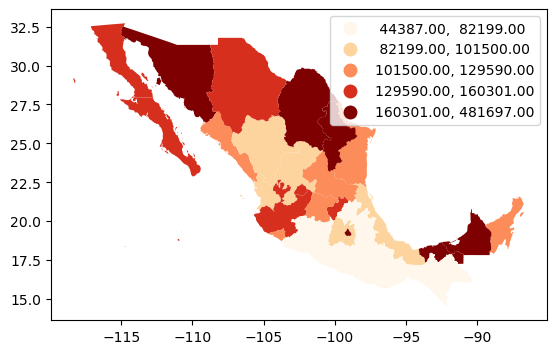

In [28]:
merged.plot(column='pibPC', cmap='OrRd', scheme='quantiles', legend=True)

## Mapas con distintas *layers*

### Proyecciones

Antes de aplicar distintas *layers* de poligonos tenemos que asegurarnos que se encuentren en el mismo *CRS* (*Coordinate Reference Systems*)

El CRS es importante porque las formas geométricas en un objeto GeoSeries o GeoDataFrame son simplemente una colección de coordenadas en un espacio arbitrario. Un CRS le dice a Python cómo se relacionan esas coordenadas con lugares de la Tierra

Como referencia, algunas proyecciones muy comunes y sus códigos EPSG:

* Latitud/Longitud WGS84: "EPSG:4326"

* Zonas UTM (Norte): "EPSG:32633"

* Zonas UTM (Sur): "EPSG:32733"

Para revisar nuestro CRS simplemente usamos el comando `GeoDataFrame.crs`

In [29]:
estados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Para cambiar nuestro CRS

In [30]:
municipios = municipios.to_crs(estados.crs)


Una vez que tenemos nuestros CRS en orden, tenemos dos formas de hacer `plots` con distintas `layers` de polígonos, lineas o centroides

**Método 1**

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/3807369130.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.plot(ax=base, marker='*', color='red', markersize=5)


<Axes: >

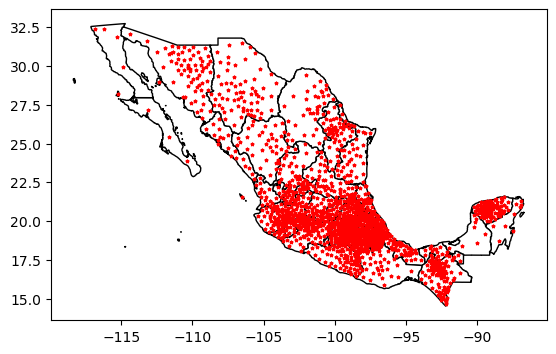

In [31]:
base = estados.plot(color='white', edgecolor='black')

municipios.centroid.plot(ax=base, marker='*', color='red', markersize=5)

**Método 2: usando objetos de `matplotlib`**

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2117381976.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.plot(ax=ax, marker='*', color='red', markersize=5)


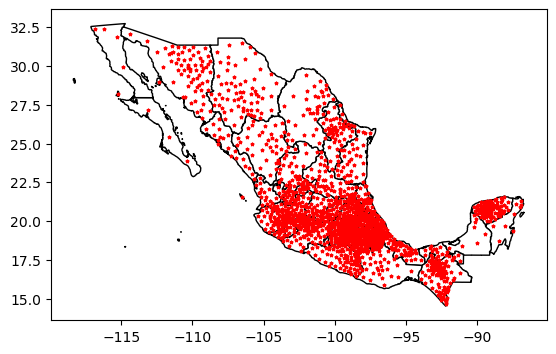

In [32]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
estados.plot(ax=ax, color='white', edgecolor='black')
municipios.centroid.plot(ax=ax, marker='*', color='red', markersize=5)
plt.show()

### Controlar el orden de varias *layers* en un *plot*

Al trazar varias *layers*, utilice `zorder` para controlar el orden de las *layers* trazadas. Cuanto más bajo sea el `zorder`, más abajo estará la capa en el mapa y viceversa.

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/3640041233.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados.plot(ax=municipios.centroid.plot(color='red',markersize=0.1), color='white', edgecolor='black')


<Axes: >

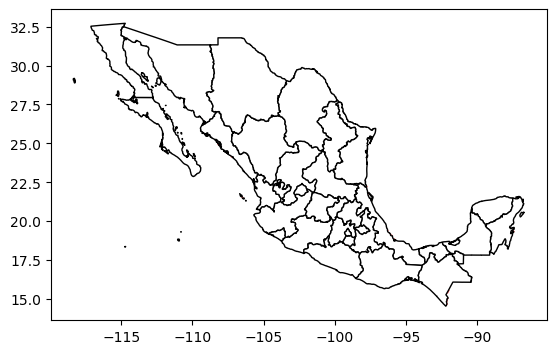

In [33]:
estados.plot(ax=municipios.centroid.plot(color='red',markersize=0.1), color='white', edgecolor='black')

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2489331414.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados.plot(ax=municipios.centroid.plot(color='red',markersize=0.1, zorder=2), color='white', edgecolor='black', zorder=1);


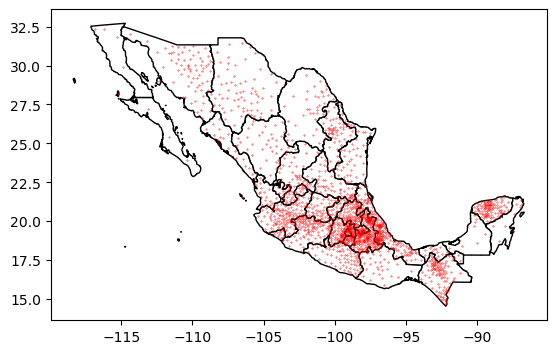

In [34]:
estados.plot(ax=municipios.centroid.plot(color='red',markersize=0.1, zorder=2), color='white', edgecolor='black', zorder=1);

## Datos faltantes

En algunos casos, es posible que se desee hacer *plots* con datos que contengan *missing values*, ya que para algunas características simplemente se desconoce el valor. Esto es posible con la librería de `numpy`

<Axes: >

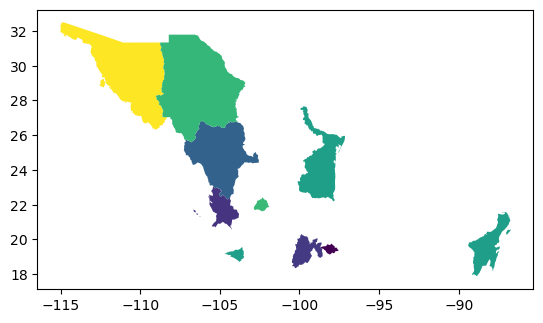

In [35]:
merged_nan = pd.merge(estados, pd_df, on='id')
merged_nan.loc[np.random.choice(merged_nan.index, 30), 'pibPC'] = np.nan
merged_nan.plot(column='pibPC')

<Axes: >

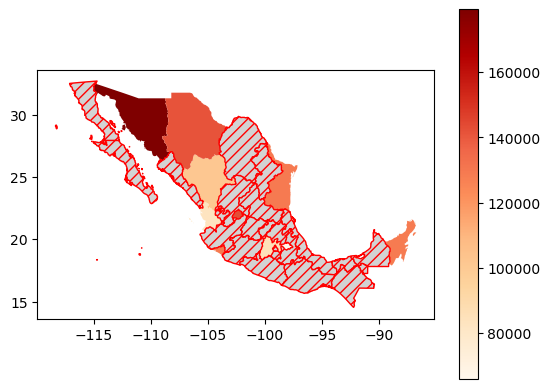

In [36]:
merged_nan.plot(
    column="pibPC",
    cmap= 'OrRd',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
)

## *Plots* de Pandas



Los métodos de plotting también permiten diferentes estilos de ploteo desde `pandas` junto con el ploteo `geo` por defecto. Se puede acceder a estos métodos utilizando el argumento kind keyword en plot(), e incluyen

* `geo` para trazado de mapas

* `line` para gráficos de líneas

* `bar` o barh para gráficos de barras

* `hist` para histograma

* `box` para boxplot

* `kde` o `density` para gráficos de densidad

* `area` para gráficos de área

* `scatter` para gráficos de dispersión

* `hexbin` para gráficos hexagonales

* `pie` para gráficos circulares

<Axes: xlabel='pibPC', ylabel='pob_ind'>

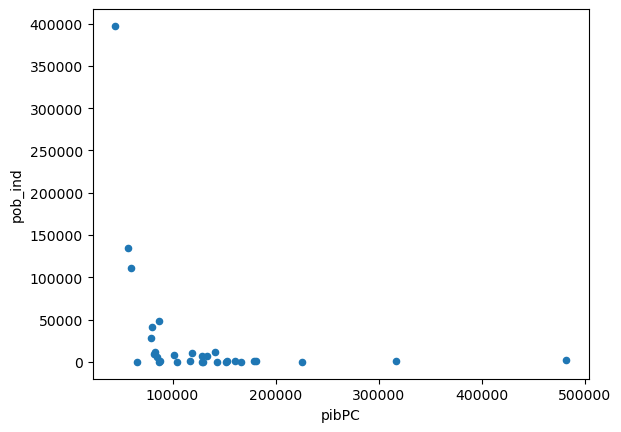

In [37]:
merged.plot(kind='scatter', x="pibPC", y="pob_ind")



---



# **Mapas interactivos**

Además de los gráficos estáticos, `geopandas` puede crear mapas interactivos basados en la biblioteca `folium`

La opción más sencilla es utilizar `GeoDataFrame.explore()`:

In [38]:
estados.explore()

In [39]:
municipios.centroid.explore()

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/1471288924.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.explore()


In [40]:
merged.boundary.explore()

Un poco más complejo

In [41]:
estados.explore(
     column="name", # make choropleth based on "pibPC" column
     tooltip="name", # show "pibPC" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
    )

In [42]:
m = merged.explore(
     column="pibPC", 
     cmap='OrRd',
     scheme='quantiles',
     legend=True, 
     k=10, 
     legend_kwds=dict(colorbar=False), 
     name="Estados"
)

municipios.centroid.explore(
     m=m, # pass the map object
     color="k", 
     marker_kwds=dict(radius=2, fill=True), 
     name="Municipios" 
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m 

/var/folders/kd/nxdbz96s1fd8rlr4vhqrzt480000gn/T/ipykernel_80358/2848931568.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.explore(




---



# **GeoCoding**

`GeoPandas` admite la geocodificación (es decir, la conversión de nombres de lugares a ubicaciones en la Tierra) a través de `geopy`, una dependencia opcional de geopandas

El siguiente ejemplo muestra cómo obtener las ubicaciones de los estados de México y traza esas ubicaciones junto con el archivo detallado de los límites de los estados

In [47]:
estados_geocoding = gpd.tools.geocode(estados.name)

In [48]:
estados_geocoding

,geometry,address
0,POINT (-103.20857 23.08236),"Zacatecas, México"
1,POINT (-88.87557 20.68460),"Yucatán, México"
2,POINT (-96.66667 19.33333),"Veracruz, México"
3,POINT (-98.16667 19.41667),"Tlaxcala, México"
4,POINT (-98.70268 23.98916),"Tamaulipas, México"
5,POINT (-92.48312 17.95079),"Tabasco, México"
6,POINT (-110.66667 29.33333),"Sonora, México"
7,POINT (-107.50000 25.00000),"Sinaloa, México"
8,POINT (-100.49491 22.50000),"San Luis Potosí, México"
9,POINT (-88.50000 19.66667),"Quintana Roo, México"


<Axes: >

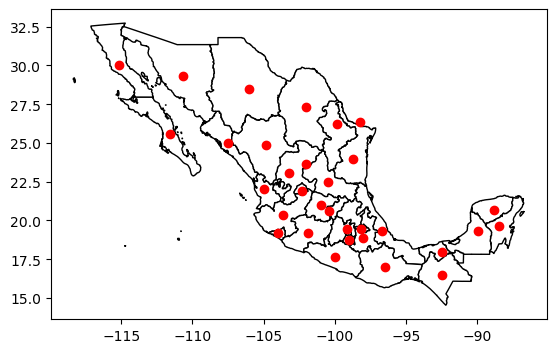

In [50]:
fig, ax = plt.subplots()

estados.plot(ax=ax, color="white", edgecolor="black");

estados_geocoding.plot(ax=ax, color="red")